# Homework week 12
6.6 (Gibbs sampling for a Poisson/gamma model).  
Suppose the vector of random variables $(X,Y)$ has the joint density function $f(x,y) = \frac{x^{a+y−1} * e^{−(1+b)x} * b^a} {\Gamma(a) * y!}$ , $x > 0,y = 0,1,2,...$ and we wish to simulate from this joint density.  
a.  Show that the conditional density $f(x|y)$ has a gamma density and identify the shape and rate parameters of this density.  
b.  Show that the conditional density $f(y|x)$ has a Poisson density.  
c.  Write a R function to implement Gibbs sampling when the constants are given by $a = 1$ and $b = 1$.  
d.  Using your R function, run 1000 cycles of the Gibbs sampler and from the output, display (say, by a histogram) the marginal probability mass function of $Y$ and compute $E(Y)$.  


# Bài làm  

a. **Conditional density $f(x | y)$:**

To find the conditional density $f(x|y)$, we'll use the definition of conditional probability:

$f(x|y) = \frac{f(x,y)}{f_Y(y)}$

Where $f_Y(y)$ is the marginal density of $Y$, which we can find by integrating $f(x,y)$ with respect to $x$:

$f_Y(y) = \int_{0}^{\infty} f(x,y) \, dx$

Let's start by finding $f_Y(y)$:

$f_Y(y) = \int_{0}^{\infty} \frac{x^{a+y−1} e^{−(1+b)x} b^a}{\Gamma(a) y!} \, dx$

$= \frac{b^a}{\Gamma(a) y!} \int_{0}^{\infty} x^{a+y−1} e^{−(1+b)x} \, dx$

Now, notice that the integral is the incomplete gamma function, $\Gamma(a+y, (1+b)x)$:

$f_Y(y) = \frac{b^a}{\Gamma(a) y!} \int_{0}^{\infty} x^{a+y−1} e^{−(1+b)x} \, dx = \frac{b^a}{\Gamma(a) y!} \Gamma(a+y, 1+b)$

Using the property of the Gamma function $\Gamma(n) = (n-1)!$ for integer $n$:

$f_Y(y) = \frac{b^a}{y!} \frac{(a+y-1)!}{(a-1)!} e^{-(1+b)}$

$= \frac{b^a}{y!} \frac{(a+y-1)!}{(a-1)!} e^{-(1+b)}$

Now, we can find the conditional density $f(x|y)$:

$f(x|y) = \frac{f(x,y)}{f_Y(y)}$

$= \frac{\frac{x^{a+y−1} e^{−(1+b)x} b^a}{\Gamma(a) y!}}{\frac{b^a}{y!} \frac{(a+y-1)!}{(a-1)!} e^{-(1+b)}}$

$= \frac{x^{a+y−1} e^{−(1+b)x} (a-1)!}{\Gamma(a) (a+y-1)!}$

$= \frac{(1+b)^{a+y}}{\Gamma(a)} x^{a+y-1} e^{-(1+b)x}$

$= \frac{(1+b)^{a+y}}{\Gamma(a)} \frac{x^{a+y-1} e^{-(1+b)x}}{\Gamma(a+y)} \frac{\Gamma(a+y)}{\Gamma(a+y)}$

$= \frac{(1+b)^{a+y}}{\Gamma(a)} \frac{x^{a+y-1} e^{-(1+b)x}}{\Gamma(a+y)} \Gamma(a+y)$

The expression $\frac{x^{a+y-1} e^{-(1+b)x}}{\Gamma(a+y)}$ is the probability density function of a Gamma distribution with shape parameter $a+y$ and rate parameter $1+b$.

Therefore, the conditional density $f(x|y)$ is a Gamma distribution with shape parameter $a+y$ and rate parameter $1+b$. (Kết quả này đúng rồi - đã nháp và xác nhận là đúng nhưng xem lại cách biến đổi tính tích phân ở trên - có 1 chút vấn đề)

b. **Conditional density $f(y | x)$:**

To find the conditional density $f(y | x)$, we use the definition of conditional probability:

$f(y | x) = \frac{f(x,y)}{f_X(x)}$

Given:
$f(x,y) = \frac{x^{a+y−1} * e^{−(1+b)x} * b^a} {\Gamma(a) * y!}$

The marginal density of $ X $ is found by integrating $f(x,y)$ with respect to $y$:

$f_X(x) = \sum_{y=0}^{\infty} \frac{x^{a+y−1} * e^{−(1+b)x} * b^a} {\Gamma(a) * y!}$

$f_X(x) = \frac{x^{a-1} * e^{−(1+b)x} * b^a} {\Gamma(a)} \sum_{y=0}^{\infty} \frac{x^{y}} {y!}$

$f_X(x) = \frac{x^{a-1} * e^{−(1+b)x} * b^a} {\Gamma(a)} e^x$

$f_X(x) = \frac{x^{a-1} * e^{−bx} * b^a} {\Gamma(a)}$

$f_X(x) = \frac{x^{a-1} * e^{−bx} * b^{a}} {\Gamma(a)}$

$f(y | x) = \frac{x^y * e^{-x}}{y!}$

Therefore, the conditional density $f(y | x)$ is a Poisson density with parameter $\lambda = x$.

c. **R function for Gibbs Sampling:**

Therefore, the conditional density $f(x|y)$ is a Gamma distribution with shape parameter $a+y$ and rate parameter $1+b$. và Therefore, the conditional density $f(y | x)$ is a Poisson density with parameter $\lambda = x$.

In [1]:
# Function to implement Gibbs sampling
gibbs_sampler <- function(N, a = 1, b = 1) {
  # Initialize empty vectors to store samples
  x <- numeric(N)
  y <- numeric(N)
  
  # Initialize y[1]
  y[1] <- 0
  
  for (i in 2:N) {
    # Sample x[i] from Gamma distribution with shape = a + y[i-1] and rate = 1 + b
    x[i] <- rgamma(1, shape = a + y[i-1], rate = 1 + b)
    
    # Sample y[i] from Poisson distribution with lambda = x[i]
    y[i] <- rpois(1, lambda = x[i])
  }
  
  # Return samples of x and y
  return(list(x = x, y = y))
}

d. **Running Gibbs Sampler and plotting histogram of $Y$:**

E(Y) = 0.991 


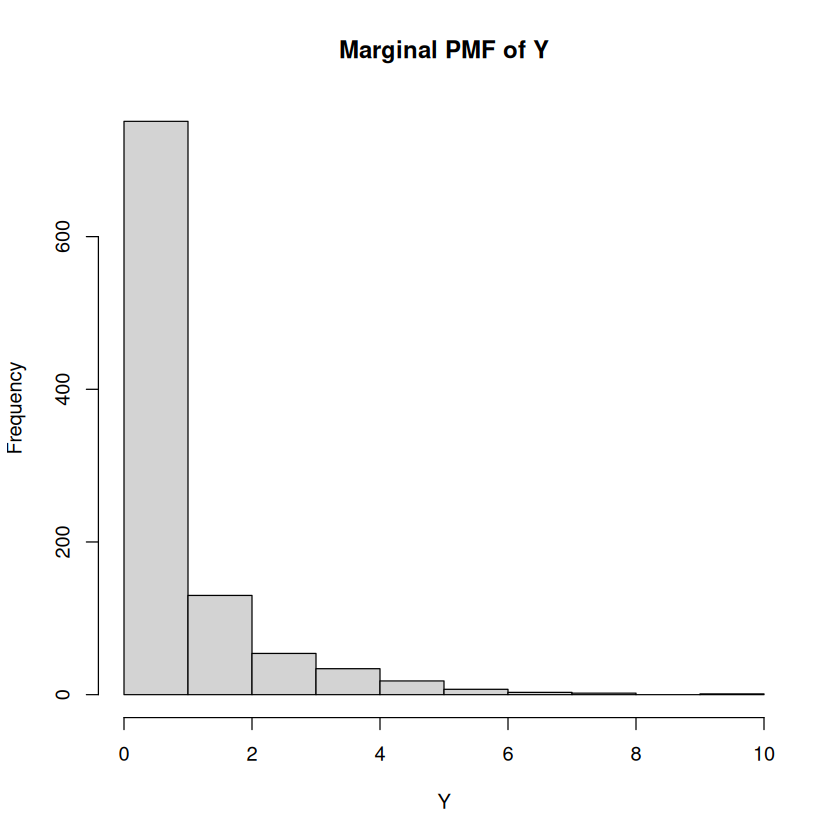

In [3]:
# Set the number of cycles
N <- 1000

# Run Gibbs sampler
gibbs_output <- gibbs_sampler(N)

# Display histogram of marginal probability mass function of Y
hist(gibbs_output$y, breaks = 12, main = "Marginal PMF of Y", xlab = "Y", ylab = "Frequency")

# Compute E(Y)
E_Y <- mean(gibbs_output$y)
cat("E(Y) =", E_Y, "\n")


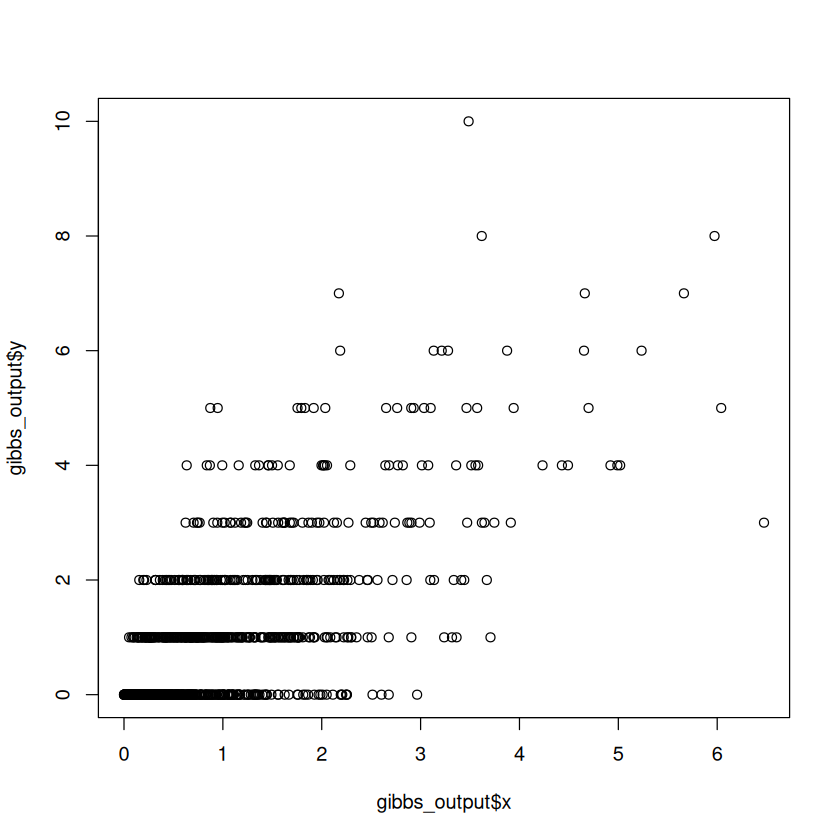

In [6]:
plot(gibbs_output$x, gibbs_output$y)